<a href="https://colab.research.google.com/github/melbow2424/Data-602-Assignment-8/blob/main/Copy_of_08_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 8**

# **Weeks 10 & 11 - matplotlib & seaborn**
* In this homework assignment, you will explore and analyze a public dataset of your choosing. Since this assignment is “open-ended” in nature, you are free to expand upon the requirements below. However, you must meet the minimum requirments as indicated in each section. 


* The preferred method for this analysis is in a .ipynb file. Feel free to use whichever platform of your choosing.  


### **Some data examples:**
•	https://www.data.gov/

•	https://opendata.cityofnewyork.us/

•	https://datasetsearch.research.google.com/

•	https://archive.ics.uci.edu/ml/index.php

### **Resources:**

•	https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html 

•	https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html

•	https://www.data-to-viz.com/



### **Headings or comments**
**You are required to make use of comments, or headings for each section.  You must explain what your code is doing, and the results of running your code.**  Act as if you were giving this assignment to your manager - you must include clear and descriptive information for each section.

### **You may work as a group or indivdually on this assignment.**


# Introduction

In this section, please describe the dataset you are using.  Include a link to the source of this data.  You should also provide some explanation on why you choose this dataset.

______________
# Data Exploration
Import your dataset into your .ipynb, create dataframes, and explore your data.  

Include: 

* Summary statistics means, medians, quartiles, 
* Missing value information
* Any other relevant information about the dataset.  



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading csv Provisional COVID-19 Deaths by HHS Region, Race, and Age found from (https://catalog.data.gov/dataset/provisional-weekly-deaths-by-region-race-age-997d6)
df = pd.read_csv('https://raw.githubusercontent.com/melbow2424/Data-602-Assignment-8/main/Provisional_COVID-19_Deaths_by_HHS_Region__Race__and_Age.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
#Explore Data (Looking over Data Types)
print("Data Types of The Columns in Data Frame")
display(df.dtypes)

Data Types of The Columns in Data Frame


Data As Of                         object
Start Date                         object
End Date                           object
Group                              object
Year                               object
Month                             float64
MMWR Week                         float64
Week-Ending Date                   object
HHS Region                         object
Race and Hispanic Origin Group     object
Age Group                          object
COVID-19 Deaths                   float64
Total Deaths                      float64
Footnote                           object
dtype: object

In [4]:
#Figure out the shape of the data frame
df.shape

(146520, 14)

# Data Wrangling

Perform data wrangling.  You are free to use your best judgment here.  If you are stuck, look at previous assignment.

In [5]:
# Subsetting Data to Look at Covid Death's in the United States Only
df_US = df.loc[df['HHS Region'] == "United States"] 
df_US.head()
#df_US.shape

,Data As Of,Start Date,End Date,Group,Year,Month,MMWR Week,Week-Ending Date,HHS Region,Race and Hispanic Origin Group,Age Group,COVID-19 Deaths,Total Deaths,Footnote
0,10/26/2022,12/29/2019,01/04/2020,By Week,2019/2020,NaN,1.0,01/04/2020,United States,Hispanic,0-4 years,0.0,104.0,NaN
1,10/26/2022,12/29/2019,01/04/2020,By Week,2019/2020,NaN,1.0,01/04/2020,United States,Hispanic,5-17 years,0.0,41.0,NaN
2,10/26/2022,12/29/2019,01/04/2020,By Week,2019/2020,NaN,1.0,01/04/2020,United States,Hispanic,18-29 years,0.0,190.0,NaN
3,10/26/2022,12/29/2019,01/04/2020,By Week,2019/2020,NaN,1.0,01/04/2020,United States,Hispanic,30-39 years,0.0,237.0,NaN
4,10/26/2022,12/29/2019,01/04/2020,By Week,2019/2020,NaN,1.0,01/04/2020,United States,Hispanic,40-49 years,0.0,325.0,NaN


In [6]:
# Subsetting Data to Look at Covid Death's in the United States in 2021 Only
df_US_2021=df_US[(df_US['Year'] == "2021" ) | (df_US['Year'] == '2020/2021')]
df_US_2021.head()
#df_US_2021.shape

,Data As Of,Start Date,End Date,Group,Year,Month,MMWR Week,Week-Ending Date,HHS Region,Race and Hispanic Origin Group,Age Group,COVID-19 Deaths,Total Deaths,Footnote
3744,10/26/2022,12/27/2020,01/02/2021,By Week,2020/2021,NaN,53.0,01/02/2021,United States,Hispanic,0-4 years,4.0,95.0,NaN
3745,10/26/2022,12/27/2020,01/02/2021,By Week,2020/2021,NaN,53.0,01/02/2021,United States,Hispanic,5-17 years,2.0,48.0,NaN
3746,10/26/2022,12/27/2020,01/02/2021,By Week,2020/2021,NaN,53.0,01/02/2021,United States,Hispanic,18-29 years,42.0,293.0,NaN
3747,10/26/2022,12/27/2020,01/02/2021,By Week,2020/2021,NaN,53.0,01/02/2021,United States,Hispanic,30-39 years,106.0,369.0,NaN
3748,10/26/2022,12/27/2020,01/02/2021,By Week,2020/2021,NaN,53.0,01/02/2021,United States,Hispanic,40-49 years,300.0,656.0,NaN


In [7]:
#Summing Covid Death by Week
df_US_2021_byweek = df_US_2021.groupby("MMWR Week").agg({"COVID-19 Deaths":'sum'})
#df_US_2021_byweek.head()
df_US_2021_byweek.shape

(52, 1)

In [9]:
# Changing names in Race and Hispanic Origin Group column to make bar graph easier to read
df_US_2021['Race and Hispanic Origin Group'].mask(df_US_2021['Race and Hispanic Origin Group'] == 'Non-Hispanic Black', 'Black', inplace=True)
df_US_2021['Race and Hispanic Origin Group'].mask(df_US_2021['Race and Hispanic Origin Group'] == 'Non-Hispanic American Indian or Alaska Native', 'American Indian', inplace=True)
df_US_2021['Race and Hispanic Origin Group'].mask(df_US_2021['Race and Hispanic Origin Group'] == 'Non-Hispanic Asian', 'Asian', inplace=True)
df_US_2021['Race and Hispanic Origin Group'].mask(df_US_2021['Race and Hispanic Origin Group'] == 'Non-Hispanic More than one race', 'More than one race', inplace=True)
df_US_2021['Race and Hispanic Origin Group'].mask(df_US_2021['Race and Hispanic Origin Group'] == 'Non-Hispanic Native Hawaiian or Other Pacific Islander', 'Native Hawaiian', inplace=True)
df_US_2021['Race and Hispanic Origin Group'].mask(df_US_2021['Race and Hispanic Origin Group'] == 'Non-Hispanic White', 'White', inplace=True)
# Get the unique values of column
df_US_2021['Race and Hispanic Origin Group'].unique()

array(['Hispanic', 'American Indian', 'Asian', 'Black',
       'More than one race', 'Native Hawaiian', 'White', 'Unknown'],
      dtype=object)

In [10]:
#Summing Covid Death by Race and Hispanic Origin Group
df_US_2021_byorigin = df_US_2021.groupby("Race and Hispanic Origin Group").agg({"COVID-19 Deaths":'sum'})
df_US_2021_byorigin.sort_values(by=['COVID-19 Deaths'], inplace=True)
df_US_2021_byorigin
#df_US_2021_byorigin.shape

,COVID-19 Deaths
Race and Hispanic Origin Group,
Unknown,2471.0
Native Hawaiian,3571.0
More than one race,6098.0
American Indian,15268.0
Asian,41892.0
Black,186832.0
Hispanic,222454.0
White,918760.0


In [11]:
# consider the list
list1 = [2471.0, 3571.0 , 6098.0]
  
# drop rows from above list
df_US_2021_byorigin = df_US_2021_byorigin[df_US_2021_byorigin["COVID-19 Deaths"].isin(list1) == False]
df_US_2021_byorigin
#df_US_2021_byorigin.shape 

,COVID-19 Deaths
Race and Hispanic Origin Group,
American Indian,15268.0
Asian,41892.0
Black,186832.0
Hispanic,222454.0
White,918760.0


# Visualizations

The main purpose of this assignment is to practice creating various visualizations using the matplotlib and seaborn library.

### **Part 1:**
Using matplotlib, create ***two or more plots*** that incorporate at least **5** of the following properties:

Note: these properties vary based on your data.  The goal is to practice creating visualizations and modifying its properties. 

*   Use and change a legend position
*   Change a legend font size
*   Place a legend outside of the plot
*   Create a single legend for all subplots
*   Change the title and x/y labels
*   Change the marker, line colors, and line width
*   Add annotations
*   Modify Axis Text Ticks/Labels
*   Change size of axis Labels
*   Your own choice not included above 


Plots that you can create **include**:

*   Scatter Plot
*   Bar plot
*   Line Chart
*   Multi Plots (e.g. using .subplot()
*   Histogram

You can add another plot not listed here if it works better for your data.  This is not a complete list of plots to create.

### **Part 2:**

Recreate the visualizations above using the Seaborn library as best as possible.  


**You are required to explain what each of your plots is representing. Plots without comments will not be accepted.**  In addition, please explain the properties you are showcasing.


### **Part 3:**
In a comment or text box, explain the differences between creating a plot in matplotlib and seaborn, based on your above plots.



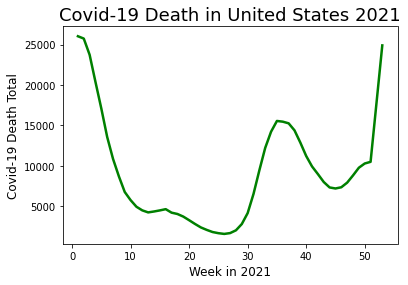

In [12]:
#Using Matplotlib to plot a line graph
df_US_2021_byweek.plot(y = "COVID-19 Deaths",
                       color='g',           # Changing color
                       linewidth = 2.5,     # Changing line width
                       legend = None)       # Adding color added a legend so it was removed 
plt.title("Covid-19 Death in United States 2021", fontsize = 18)   # Adding a Title. Changing font size of title
plt. xlabel("Week in 2021", fontsize = 12)                         # Adding x-axis label. Changing font size of label
plt. ylabel("Covid-19 Death Total", fontsize = 12)                 # Adding y-axis label. Changing font size of label
plt.show()

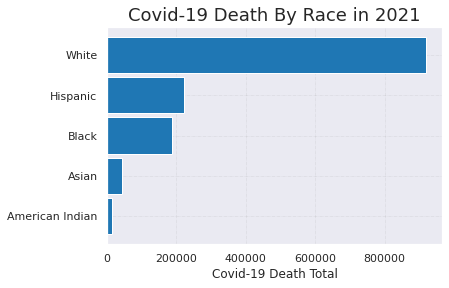

In [77]:
#Using Matplotlib to plot a bar graph
df_US_2021_byorigin.plot.barh(color='tab:blue',          # Changing color 
                              width = 0.9,               # Changing width
                              legend = None)             # Legend was removed
plt.title("Covid-19 Death By Race in 2021", fontsize = 18)   # Adding a Title. Changing font size of title
plt. xlabel("Covid-19 Death Total", fontsize = 12)           # Adding x-axis label. Changing font size of label
plt. ylabel("")                                              # Removing y-axis label. 
# Add x, y gridlines
plt.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

In [ ]:
# Catherine Cho trying to Help with bar colors but still not working 
'''
y = df_US_2021_byorigin['Race and Hispanic Origin Group']
width = df_US_2021_byorigin['COVID-19 Deaths']
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:purple']
plt.barh( y, width, color = bar_colors)
'''

Text(0, 0.5, 'Covid-19 Death Total')

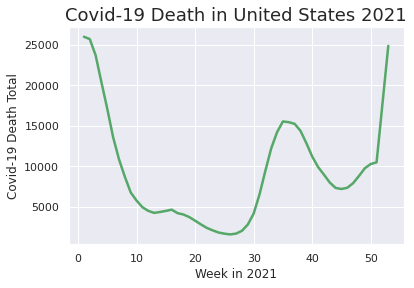

In [67]:
#Using Seaborn to plot a line graph (Comparing it to the Matplotlib graph)
sns.set_theme(style="darkgrid")               # Sets background theme
ax = sns.lineplot(x = "MMWR Week" ,           # Calls x values
                  y = "COVID-19 Deaths",      # Calls y values
                  data = df_US_2021_byweek,   # Calls dataframe being used
                  color = 'g',                # Changes Colors
                  linewidth = 2.5)            # Changing line width
#specfiy axis labels
plt.title("Covid-19 Death in United States 2021", fontsize = 18)   # Adding a Title. Changing font size of title
plt. xlabel("Week in 2021", fontsize = 12)                         # Adding x-axis label. Changing font size of label
plt. ylabel("Covid-19 Death Total", fontsize = 12)                 # Adding y-axis label. Changing font size of label

Text(0, 0.5, '')

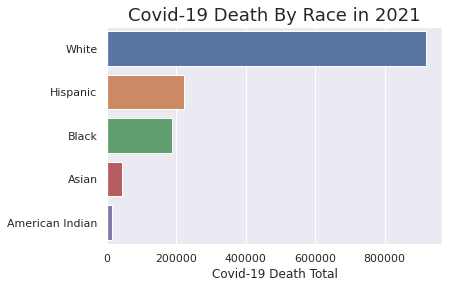

In [84]:
#Using Seaborn to plot a bar graph (Comparing it to the Matplotlib graph)
sns.barplot(data = df_US_2021,                                                  # Calls data frame: Note the data frame call was not the transformed data frame df_US_2021_byorigin
            x = 'COVID-19 Deaths',                                              # Calls x values
            y = 'Race and Hispanic Origin Group',                               # Calls y values
            estimator = sum,                                                    # Summing Covid Death by Race and Hispanic Origin Group (without having to transform data)
            ci = None,                                                          # Hiding errorbars with method ci
            order = ["White", "Hispanic", "Black", "Asian", "American Indian"]) # Manually ordering graph. Was also able to remove some races 
plt.title("Covid-19 Death By Race in 2021", fontsize = 18)   # Adding a Title. Changing font size of title
plt. xlabel("Covid-19 Death Total", fontsize = 12)           # Adding x-axis label. Changing font size of label
plt. ylabel("")                                              # Removing y-axis label. 

# Conclusions  

After exploring your dataset, provide a short summary of what you noticed from this dataset.  

>> Matplotlib and Seaborn are useful python packages to create easily readable visualization of data frame information. The biggest difference I found between the two was that with Seaborn can be used with little transforming data where Matplotlib needs data transformation before plotting. I can see Seaborn being the most useful visualizer when using data frames, it was created for that direct reason. However, there is a learning curve to understand all the way in which you can visualize the data directly from the Seaborn plot mechanisms. In this assignment, the data exploration was used to determine if data types where string or numeric when appropriate. The data wrangling was driven directly by what visualization was created. 